In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt

In [128]:
data = pd.read_csv('nam_auto.csv')

# Exploring the data

In [129]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,"N$ 59,999",smart,forfour,A/T,USED,1.0,NaN,Blue,greenise,blue/siler,5,Petrol,Hatchback,"51,000 km",0.9 l,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,"N$ 74,999",Volkswagen,up!,up! 5-door 1.0,USED,1.0,NaN,Silver,grey,silver,5,Petrol,Hatchback,"54,800 km",1 l,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,"N$ 75,000",Fiat,Strada,1.4 WORKING,BASSON,1.0,NaN,White,Grey,White,2,Petrol,Bakkie Single Cab,"155,000 km",1.4 l,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,"N$ 75,000",Honda,Civic,2.2 CDTi VXi 5dr,USED,1.0,NaN,Blue,BLACK,Dark Blue,5,Diesel,Hatchback,"161,000 km",2.2 l,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,"N$ 95,900",Datsun,GO,1.2 LUX,USED,1.0,NaN,Silver,grey,Silver,5,Petrol,Hatchback,"31,000 km",1.2 l,Manual


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 18 columns):
index              1177 non-null int64
url                1177 non-null object
price              1177 non-null object
make               1177 non-null object
model              1177 non-null object
variant            1177 non-null object
reg                1177 non-null object
previous-owners    633 non-null float64
mpg                123 non-null object
colour             1175 non-null object
interior-colour    963 non-null object
exterior-colour    1131 non-null object
doors              1161 non-null object
fuel-type          1157 non-null object
bodystyle          1177 non-null object
mileage            1078 non-null object
engine-size        1159 non-null object
transmission       1148 non-null object
dtypes: float64(1), int64(1), object(16)
memory usage: 165.6+ KB


# Preparation of data

In [131]:
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending = False) != 0]
    perc = round(df.isnull().sum().sort_values(ascending=False) / len(df) * 100)[df.isnull().sum().sort_values(ascending = False) != 0]
    return pd.concat([total, perc], axis=1, keys=['Total', 'Percent'])

In [132]:
missing_percentage(data)

,Total,Percent
mpg,1054,90.0
previous-owners,544,46.0
interior-colour,214,18.0
mileage,99,8.0
exterior-colour,46,4.0
transmission,29,2.0
fuel-type,20,2.0
engine-size,18,2.0
doors,16,1.0
colour,2,0.0


Price cleaning

In [133]:
def trim_data(df):
    return df.replace(r'N', '').replace('$', '').replace(',','')

In [134]:
data['price'] = data['price'].apply(trim_data)
data['price'] = data['price'].str.replace('([A-Za-z])', '')

In [135]:
data['price'] = data['price'].apply(lambda x: x.rstrip())

In [136]:
index = data.loc[data['price'] == ''].index
data.drop(index, inplace=True)

In [137]:
data['price'] = data['price'].astype("int")

Make cleaning

In [138]:
def clean_make(text):
    if 'merc' in text.lower():
        return 'Mercedes-Benz'.lower()
    else:
        return text.lower()

In [139]:
data['make'] = data['make'].apply(clean_make)

In [140]:
make_group = data.groupby(by=['make']).agg({'make':'count', 'price': 'mean'}).rename(columns={'make':'Total', 'price': 'Avg_Price'}).reset_index()

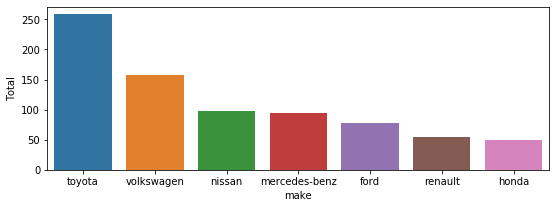

In [141]:
plt.figure(figsize=(9, 3))
sns.barplot(x='make', y='Total', data=make_group.sort_values(by='Total',ascending=False).head(7))

Mileage cleaning

In [142]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,USED,1.0,NaN,Blue,greenise,blue/siler,5,Petrol,Hatchback,"51,000 km",0.9 l,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up!,up! 5-door 1.0,USED,1.0,NaN,Silver,grey,silver,5,Petrol,Hatchback,"54,800 km",1 l,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,Strada,1.4 WORKING,BASSON,1.0,NaN,White,Grey,White,2,Petrol,Bakkie Single Cab,"155,000 km",1.4 l,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,Civic,2.2 CDTi VXi 5dr,USED,1.0,NaN,Blue,BLACK,Dark Blue,5,Diesel,Hatchback,"161,000 km",2.2 l,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,GO,1.2 LUX,USED,1.0,NaN,Silver,grey,Silver,5,Petrol,Hatchback,"31,000 km",1.2 l,Manual


In [258]:
def replace_character(text):
    text = re.sub(r'.[A-Ba-z]+', '', str(text))
    text = text.replace(',', '')
    text = text.rstrip()
    return text

In [144]:
data['mileage'] = data['mileage'].apply(lambda x: replace_character(x) if pd.notnull(x) else x)

Engine-size cleaning

In [145]:
data['engine-size'] = pd.to_numeric(data['engine-size'].apply(replace_character))

In [146]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,USED,1.0,NaN,Blue,greenise,blue/siler,5,Petrol,Hatchback,51000,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up!,up! 5-door 1.0,USED,1.0,NaN,Silver,grey,silver,5,Petrol,Hatchback,54800,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,Strada,1.4 WORKING,BASSON,1.0,NaN,White,Grey,White,2,Petrol,Bakkie Single Cab,155000,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,Civic,2.2 CDTi VXi 5dr,USED,1.0,NaN,Blue,BLACK,Dark Blue,5,Diesel,Hatchback,161000,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,GO,1.2 LUX,USED,1.0,NaN,Silver,grey,Silver,5,Petrol,Hatchback,31000,1.2,Manual


Model cleaning

In [147]:
data['model'].unique()

array(['forfour', 'up!', 'Strada', 'Civic', 'GO', 'Polo', 'i20', 'GT',
       'ETIOS', 'Grand Cherokee', 'Picanto', 'UTILITY', 'NP200', 'S40',
       'SANDERO', 'T5 KOMBI', 'Figo', 'POLO VIVO', 'Aygo', 'Duster', 'LX',
       'Fiesta', 'Almera', 'Corolla Quest', 'HARDBODY', 'Tourneo', 'Golf',
       'Corolla', 'TAKE UP', 'Juke', 'EcoSport', 'Focus',
       'NP300 Hardbody', 'Sportage', 'Qashqai', 'Auris', 'Rio', 'X TRAIL',
       'AVANZA', 'ix35', 'Jetta', 'ASX', 'Captur', 'Steed 5', 'Jazz',
       'New Micra', 'Fortuner', 'Ranger', 'A3', 'BR-V', 'Yaris', 'Clio',
       'Hilux', 'RAV4', 'Ballade', 'Jimny', 'Pajero', 'XUV 500',
       '3 Series', 'CC', 'SX4', 'Navara', '500', 'Land Cruiser', '3',
       'Safari', 'KB', 'Panda', 'Tipo', 'A4', 'QUANTUM', 'Micra',
       'Amarok', 'X5', 'Kuga', 'XF', 'BT-50', 'Wrangler', 'Q5', 'Tucson',
       'Fullback', 'Tiguan', 'B Class', 'A-Class', 'CX-5', 'Q3',
       'E Class', 'EVOQUE', 'A Class', 'Cherokee', 'Caddy',
       'Land Cruiser 79', 'GLA'

In [159]:
def remove_characters(text):
    text = re.sub(r'[!@#$]','', text)
    return text.lower()

In [160]:
data['model'].apply(lambda x: remove_characters(x)).unique()

array(['forfour', 'up', 'strada', 'civic', 'go', 'polo', 'i20', 'gt',
       'etios', 'grand cherokee', 'picanto', 'utility', 'np200', 's40',
       'sandero', 't5 kombi', 'figo', 'polo vivo', 'aygo', 'duster', 'lx',
       'fiesta', 'almera', 'corolla quest', 'hardbody', 'tourneo', 'golf',
       'corolla', 'take up', 'juke', 'ecosport', 'focus',
       'np300 hardbody', 'sportage', 'qashqai', 'auris', 'rio', 'x trail',
       'avanza', 'ix35', 'jetta', 'asx', 'captur', 'steed 5', 'jazz',
       'new micra', 'fortuner', 'ranger', 'a3', 'br-v', 'yaris', 'clio',
       'hilux', 'rav4', 'ballade', 'jimny', 'pajero', 'xuv 500',
       '3 series', 'cc', 'sx4', 'navara', '500', 'land cruiser', '3',
       'safari', 'kb', 'panda', 'tipo', 'a4', 'quantum', 'micra',
       'amarok', 'x5', 'kuga', 'xf', 'bt-50', 'wrangler', 'q5', 'tucson',
       'fullback', 'tiguan', 'b class', 'a-class', 'cx-5', 'q3',
       'e class', 'evoque', 'a class', 'cherokee', 'caddy',
       'land cruiser 79', 'gla',

Reg cleaning

In [148]:
def clean_reg(text):
    text = text.lower()
    if any(word in text for word in ['new']):
        return 'new'
    
    return 'used'

In [149]:
data['reg'] = data['reg'].apply(clean_reg)

In [150]:
data['reg'].value_counts(dropna=False)

used    721
new     365
Name: reg, dtype: int64

Previous owner cleaning

In [151]:
index = data[(data['previous-owners'].isna()) & (data['reg'] == 'new')].index

In [152]:
data.loc[index, 'previous-owners']= 0

In [153]:
missing_percentage(data)

,Total,Percent
mpg,964,89.0
interior-colour,212,20.0
previous-owners,125,12.0
mileage,97,9.0
exterior-colour,42,4.0
transmission,25,2.0
engine-size,20,2.0
fuel-type,19,2.0
doors,16,1.0
colour,2,0.0


In [154]:
data.head(5)

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,Blue,greenise,blue/siler,5,Petrol,Hatchback,51000,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up!,up! 5-door 1.0,used,1.0,NaN,Silver,grey,silver,5,Petrol,Hatchback,54800,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,Strada,1.4 WORKING,used,1.0,NaN,White,Grey,White,2,Petrol,Bakkie Single Cab,155000,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,Civic,2.2 CDTi VXi 5dr,used,1.0,NaN,Blue,BLACK,Dark Blue,5,Diesel,Hatchback,161000,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,GO,1.2 LUX,used,1.0,NaN,Silver,grey,Silver,5,Petrol,Hatchback,31000,1.2,Manual


colour cleaning 

In [175]:
data['colour'] = data['colour'].str.lower()

In [184]:
data['colour'] = data['colour'].fillna("other")

In [186]:
data['colour'].unique()

array(['blue', 'silver', 'white', 'yellow', 'gold', 'bronze', 'maroon',
       'red', 'black', 'beige', 'other', 'brown', 'grey', 'multi-colour',
       'orange', 'cream', 'green', 'sonic quartz (31i)'], dtype=object)

In [187]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,greenise,blue/siler,5,Petrol,Hatchback,51000,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up!,up! 5-door 1.0,used,1.0,NaN,silver,grey,silver,5,Petrol,Hatchback,54800,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,Strada,1.4 WORKING,used,1.0,NaN,white,Grey,White,2,Petrol,Bakkie Single Cab,155000,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,Civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,BLACK,Dark Blue,5,Diesel,Hatchback,161000,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,GO,1.2 LUX,used,1.0,NaN,silver,grey,Silver,5,Petrol,Hatchback,31000,1.2,Manual


interior-colour cleaning

In [213]:
def cleaning_interior(text, interior):
    text = text.lower().rstrip()
    if "black" in text:
        text = "black"
    
    if any(i in text for i in interior):
        text = 'other'
    return text

In [206]:
interior = data.groupby(['interior-colour'])['interior-colour'].count().to_frame('TotalCount').sort_values(by='TotalCount', ascending=False).reset_index()

In [212]:
interior = interior[interior['TotalCount'] < 10]['interior-colour'].unique()

In [261]:
data['interior-colour'] = data['interior-colour'].apply(lambda x: cleaning_interior(x, interior) if pd.notnull(x) else x)

In [260]:
data['interior-colour'].value_counts(dropna=False)

black    637
NaN      212
grey     166
other     36
brown     14
white     11
cream     10
Name: interior-colour, dtype: int64

In [219]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,other,blue/siler,5,Petrol,Hatchback,51000,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up!,up! 5-door 1.0,used,1.0,NaN,silver,grey,silver,5,Petrol,Hatchback,54800,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,Strada,1.4 WORKING,used,1.0,NaN,white,grey,White,2,Petrol,Bakkie Single Cab,155000,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,Civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,black,Dark Blue,5,Diesel,Hatchback,161000,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,GO,1.2 LUX,used,1.0,NaN,silver,grey,Silver,5,Petrol,Hatchback,31000,1.2,Manual


Doors cleaning

In [247]:
data['doors'].value_counts(dropna=False)

5         618
4         335
2          99
NaN        16
3          15
Petrol      2
1           1
Name: doors, dtype: int64

In [263]:
data['doors'].apply(lambda x: replace_character(x) if pd.notnull(x) else x).replace('', np.nan).unique().astype(float)

array([ 5.,  2.,  4.,  3., nan,  1.])

fuel-type cleaning

In [273]:
data['fuel-type'].value_counts(normalize=True, dropna=False)

petrol        0.631676
diesel        0.348987
NaN           0.017495
5 door suv    0.000921
sedan         0.000921
Name: fuel-type, dtype: float64

In [281]:
def clean_fuel(text):
    text = text.lower()
    if "petr" in text:
        text = "petrol"
    elif "dies" in text:
        text = "diesel"
    else:
        text = np.nan
    
    return text

In [282]:
data['fuel-type'] = data['fuel-type'].apply(lambda x: clean_fuel(x) if pd.notnull(x) else x)

In [283]:
data.head()

,index,url,price,make,model,variant,reg,previous-owners,mpg,colour,interior-colour,exterior-colour,doors,fuel-type,bodystyle,mileage,engine-size,transmission
0,0,https://www.namauto.com/cars/10383024-smart-fo...,59999,smart,forfour,A/T,used,1.0,NaN,blue,other,blue/siler,5,petrol,Hatchback,51000,0.9,Automatic
1,1,https://www.namauto.com/cars/10382656-volkswag...,74999,volkswagen,up!,up! 5-door 1.0,used,1.0,NaN,silver,grey,silver,5,petrol,Hatchback,54800,1.0,Manual
2,2,https://www.namauto.com/cars/10384367-fiat-str...,75000,fiat,Strada,1.4 WORKING,used,1.0,NaN,white,grey,White,2,petrol,Bakkie Single Cab,155000,1.4,Manual
3,3,https://www.namauto.com/cars/10443953-honda-ci...,75000,honda,Civic,2.2 CDTi VXi 5dr,used,1.0,NaN,blue,black,Dark Blue,5,diesel,Hatchback,161000,2.2,Manual
4,4,https://www.namauto.com/cars/10443516-datsun-g...,95900,datsun,GO,1.2 LUX,used,1.0,NaN,silver,grey,Silver,5,petrol,Hatchback,31000,1.2,Manual
